<a href="https://colab.research.google.com/github/waseemahmed41/AI-MONSTERS__Duality_ai_MS_Hack/blob/main/MS_HACK__Duality_Ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/My Drive/Ms_hack

/content/drive/My Drive/Ms_hack


In [3]:
!unzip Hackathon2_scripts.zip

Archive:  Hackathon2_scripts.zip
   creating: Hackathon2_scripts/
  inflating: Hackathon2_scripts/classes.txt  
   creating: Hackathon2_scripts/ENV_SETUP/
  inflating: Hackathon2_scripts/ENV_SETUP/create_env.bat  
  inflating: Hackathon2_scripts/ENV_SETUP/install_packages.bat  
  inflating: Hackathon2_scripts/ENV_SETUP/setup_env.bat  
  inflating: Hackathon2_scripts/predict.py  
  inflating: Hackathon2_scripts/train.py  
  inflating: Hackathon2_scripts/visualize.py  
  inflating: Hackathon2_scripts/yolo_params.yaml  


In [4]:
!unzip Hackathon2_test1.zip

Archive:  Hackathon2_test1.zip
   creating: test1/
   creating: test1/images/
  inflating: test1/images/000000001_light_unclutter.png  
  inflating: test1/images/000000001_vdark_clutter.png  
  inflating: test1/images/000000002_dark_clutter.png  
  inflating: test1/images/000000002_vlight_unclutter.png  
  inflating: test1/images/000000003_vdark_unclutter.png  
  inflating: test1/images/000000006_dark_unclutter.png  
  inflating: test1/images/000000006_light_unclutter.png  
  inflating: test1/images/000000006_vdark_unclutter.png  
  inflating: test1/images/000000007_dark_clutter.png  
  inflating: test1/images/000000007_vdark_unclutter.png  
  inflating: test1/images/000000008_light_unclutter.png  
  inflating: test1/images/000000008_vlight_unclutter.png  
  inflating: test1/images/000000010_dark_clutter.png  
  inflating: test1/images/000000010_vdark_clutter.png  
  inflating: test1/images/000000011_light_unclutter.png  
  inflating: test1/images/000000011_vdark_clutter.png  
  inflat

In [5]:
!unzip /content/drive/MyDrive/Ms_hack/hackathon2_train_1.zip

Archive:  /content/drive/MyDrive/Ms_hack/hackathon2_train_1.zip
   creating: train_1/
   creating: train_1/train1/
   creating: train_1/train1/images/
  inflating: train_1/train1/images/000000000_light_cluttered.png  
  inflating: train_1/train1/images/000000003_cluttered_room.png  
  inflating: train_1/train1/images/000000003_light_cluttered.png  
  inflating: train_1/train1/images/000000003_light_uncluttered.png  
  inflating: train_1/train1/images/000000004_cluttered_hallway.png  
  inflating: train_1/train1/images/000000006_light_cluttered.png  
  inflating: train_1/train1/images/000000006_light_cluttered_room.png  
  inflating: train_1/train1/images/000000008_cluttered_hallway.png  
  inflating: train_1/train1/images/000000008_cluttered_room.png  
  inflating: train_1/train1/images/000000009_light_cluttered_room.png  
  inflating: train_1/train1/images/000000009_light_uncluttered.png  
  inflating: train_1/train1/images/000000010_cluttered_hallway.png  
  inflating: train_1/train1

In [6]:
!pip install -q condacolab

In [7]:
import condacolab
condacolab.install()

⏬ Downloading https://github.com/jaimergp/miniforge/releases/download/24.11.2-1_colab/Miniforge3-colab-24.11.2-1_colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:09
🔁 Restarting kernel...


In [1]:
!conda install pytorch torchvision pytorch-cuda=11.8 ultralytics -c pytorch -c nvidia -c conda-forge -y
!pip install opencv-contrib-python

Streaming output truncated to the last 5000 lines.
  libxcb             conda-forge/linux-64::libxcb-1.17.0-h8a09558_0 
  llvm-openmp        conda-forge/linux-64::llvm-openmp-15.0.7-h0cdce71_0 
  markupsafe         conda-forge/linux-64::markupsafe-3.0.2-py311h2dc5d0c_1 
  matplotlib-base    conda-forge/linux-64::matplotlib-base-3.10.6-py311h0f3be63_1 
  mkl                conda-forge/linux-64::mkl-2023.2.0-ha770c72_50498 
  mpc                conda-forge/linux-64::mpc-1.3.1-h24ddda3_1 
  mpfr               conda-forge/linux-64::mpfr-4.2.1-h90cbb55_3 
  mpmath             conda-forge/noarch::mpmath-1.3.0-pyhd8ed1ab_1 
  munkres            conda-forge/noarch::munkres-1.1.4-pyhd8ed1ab_1 
  networkx           conda-forge/noarch::networkx-3.5-pyhe01879c_0 
  numpy              conda-forge/linux-64::numpy-2.3.3-py311h2e04523_0 
  ocl-icd            conda-forge/linux-64::ocl-icd-2.3.3-hb9d3cd8_0 
  opencl-headers     conda-forge/linux-64::opencl-headers-2025.06.13-h5888daf_0 
  opencv        

In [1]:
%cd /content/drive/MyDrive/Ms_hack/Hackathon2_scripts

/content/drive/MyDrive/Ms_hack/Hackathon2_scripts


In [2]:
new_content = """
EPOCHS = 100 # Increase epochs for better training
MOSAIC = 1.0 # The comment in your code says to not use 1.0, but for some datasets, it can improve accuracy
OPTIMIZER = 'AdamW'
MOMENTUM = 0.9
LR0 = 0.001 # Higher initial learning rate
LRF = 0.01 # Final learning rate factor
SINGLE_CLS = False
IMGSZ = 640 # Default image size

import argparse
from ultralytics import YOLO
import os
import sys

if __name__ == '__main__':
    parser = argparse.ArgumentParser()
    parser.add_argument('--epochs', type=int, default=EPOCHS, help='Number of epochs')
    parser.add_argument('--mosaic', type=float, default=MOSAIC, help='Mosaic augmentation')
    parser.add_argument('--optimizer', type=str, default=OPTIMIZER, help='Optimizer')
    parser.add_argument('--momentum', type=float, default=MOMENTUM, help='Momentum')
    parser.add_argument('--lr0', type=float, default=LR0, help='Initial learning rate')
    parser.add_argument('--lrf', type=float, default=LRF, help='Final learning rate')
    parser.add_argument('--single_cls', type=bool, default=SINGLE_CLS, help='Single class training')
    # Add image size as a tunable parameter
    parser.add_argument('--imgsz', type=int, default=IMGSZ, help='Input image size')
    args = parser.parse_args()

    this_dir = os.path.dirname(__file__)
    os.chdir(this_dir)

    # Use a larger model for potentially better accuracy
    # Change 'yolov8s.pt' to 'yolov8m.pt' or 'yolov8l.pt' if you have the resources.
    model = YOLO(os.path.join(this_dir, "yolov8s.pt"))

    results = model.train(
        data=os.path.join(this_dir, "yolo_params.yaml"),
        epochs=args.epochs,
        device=0,
        single_cls=args.single_cls,
        mosaic=args.mosaic,
        optimizer=args.optimizer,
        lr0=args.lr0,
        lrf=args.lrf,
        momentum=args.momentum,
        imgsz=args.imgsz, # Pass the image size argument
        patience=100, # Added patience for early stopping to prevent overfitting
    )
"""

with open('train.py', 'w') as file:
    file.write(new_content)

In [4]:
with open('train.py', 'r') as file:
    print(file.read())


EPOCHS = 100 # Increase epochs for better training
MOSAIC = 1.0 # The comment in your code says to not use 1.0, but for some datasets, it can improve accuracy
OPTIMIZER = 'AdamW'
MOMENTUM = 0.9
LR0 = 0.001 # Higher initial learning rate
LRF = 0.01 # Final learning rate factor
SINGLE_CLS = False
IMGSZ = 640 # Default image size

import argparse
from ultralytics import YOLO
import os
import sys

if __name__ == '__main__':
    parser = argparse.ArgumentParser()
    parser.add_argument('--epochs', type=int, default=EPOCHS, help='Number of epochs')
    parser.add_argument('--mosaic', type=float, default=MOSAIC, help='Mosaic augmentation')
    parser.add_argument('--optimizer', type=str, default=OPTIMIZER, help='Optimizer')
    parser.add_argument('--momentum', type=float, default=MOMENTUM, help='Momentum')
    parser.add_argument('--lr0', type=float, default=LR0, help='Initial learning rate')
    parser.add_argument('--lrf', type=float, default=LRF, help='Final learning rate')
    parser.a

In [5]:
!pip install ultralytics

In [6]:
!pip3 install matplotlib==3.7.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 29.3 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.10.6
    Uninstalling matplotlib-3.10.6:
      Successfully uninstalled matplotlib-3.10.6


In [1]:
!pip3 install numpy==1.26.4

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 119.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.6
    Uninstalling numpy-2.2.6:
      Successfully uninstalled numpy-2.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.


In [2]:
%cd /content/drive/MyDrive/Ms_hack/Hackathon2_scripts


/content/drive/MyDrive/Ms_hack/Hackathon2_scripts


In [3]:
!python train.py

Ultralytics 8.3.202 🚀 Python-3.11.11 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/Ms_hack/Hackathon2_scripts/yolo_params.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=/content/drive/MyDrive/Ms_hack/Hackathon2_scripts/yolov8s.pt, momentum=0.9, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, opti

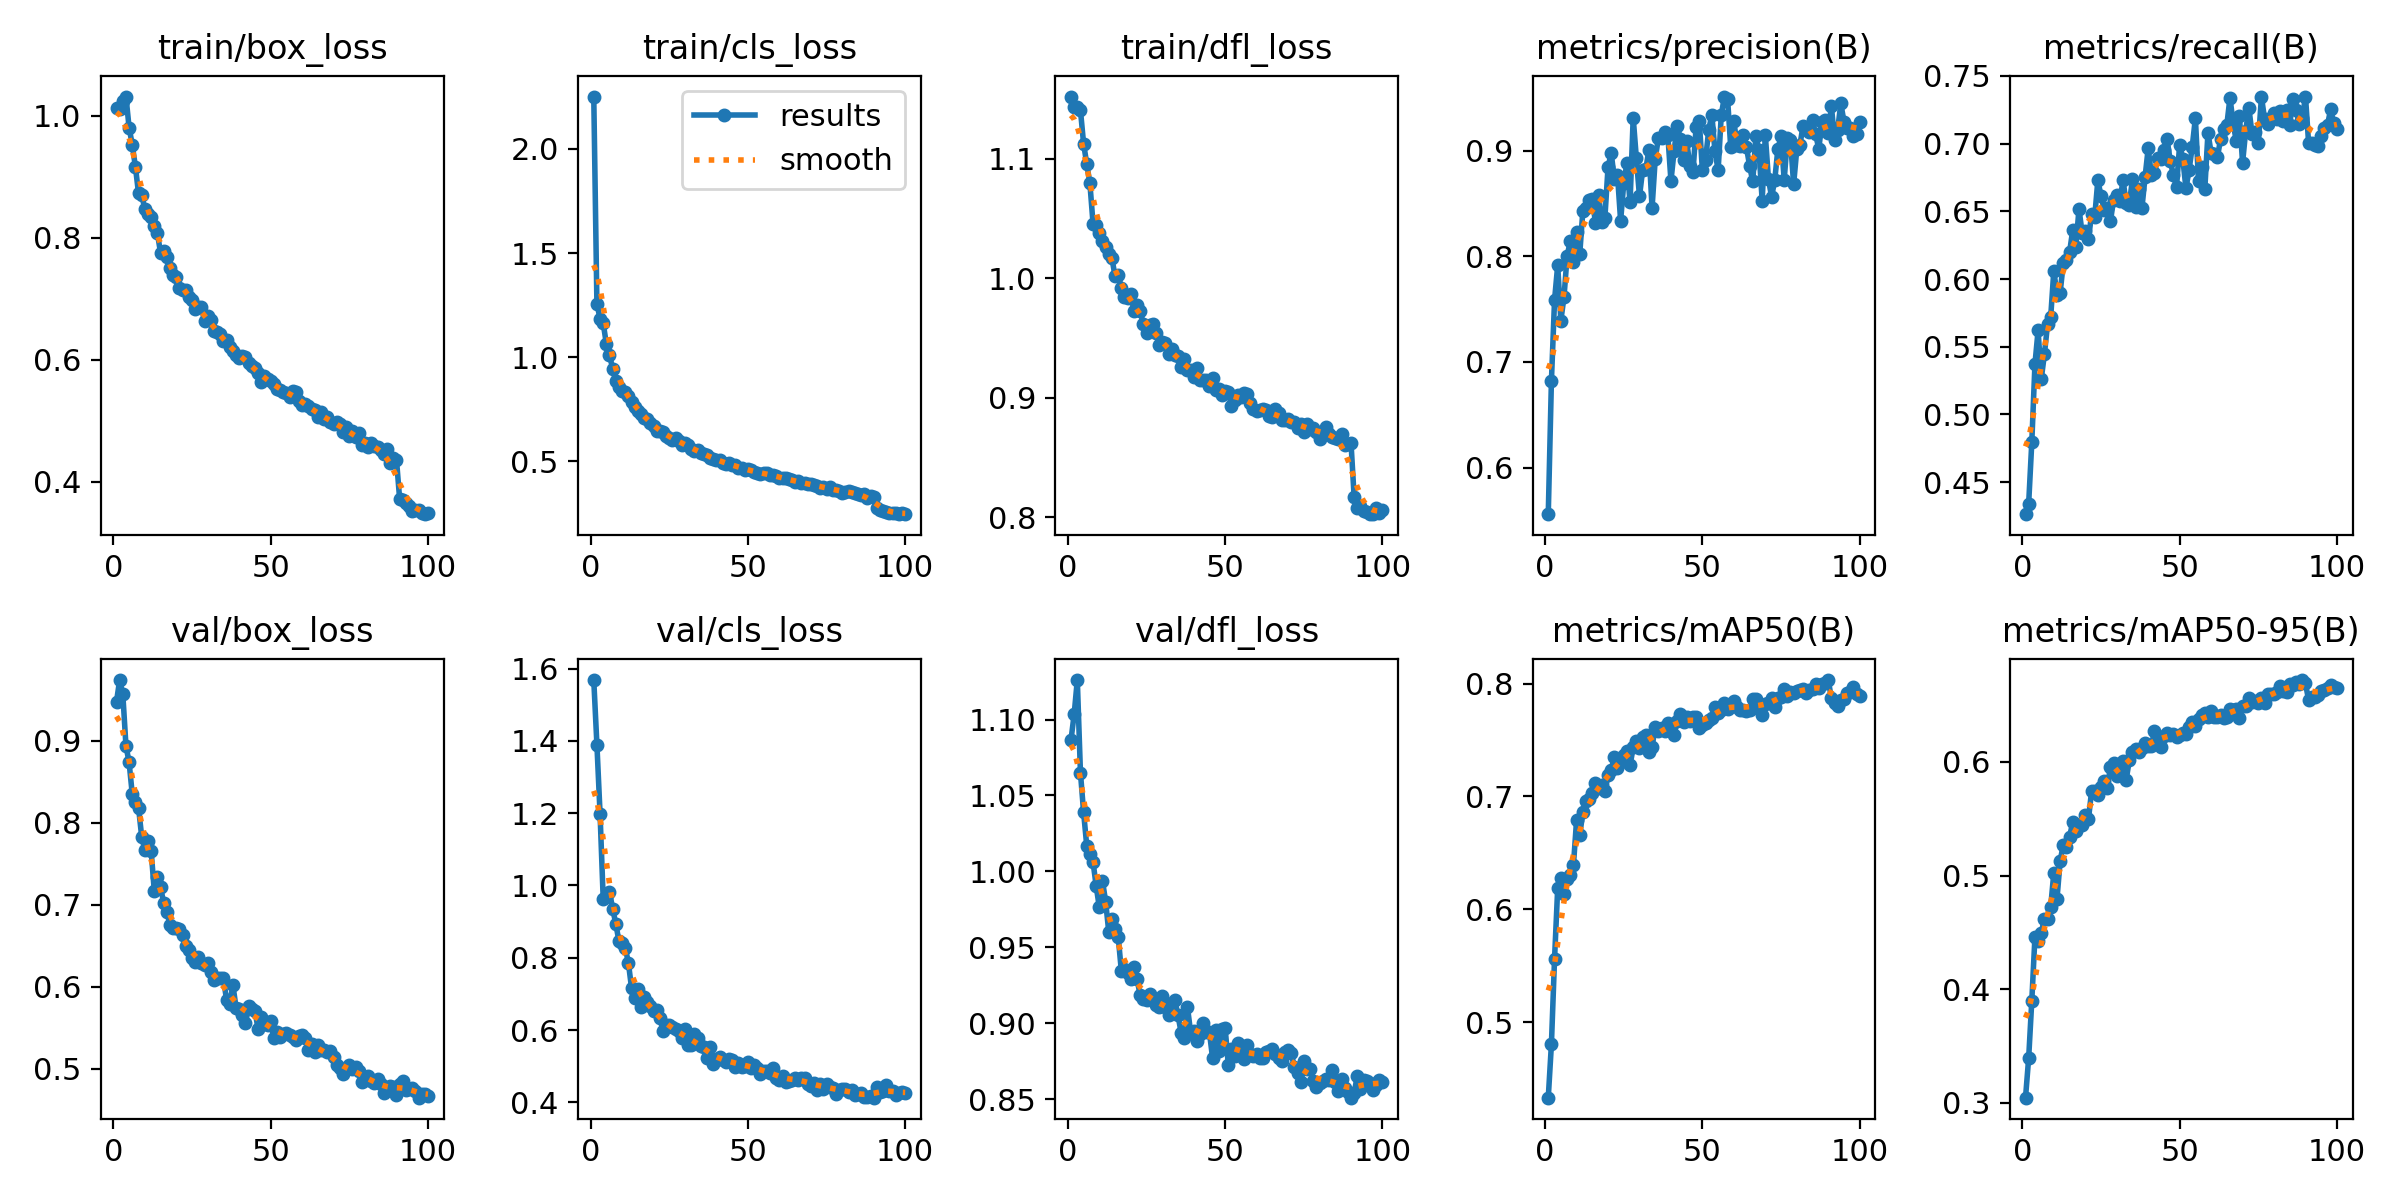

In [2]:
from IPython.display import Image
Image('/content/drive/MyDrive/Ms_hack/Hackathon2_scripts/runs/detect/train2/results.png')
